In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras
import tensorflow as tf 



In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [3]:
x_train_final=x_train.reshape((-1,784))
x_train_final=x_train_final/255

In [4]:
x_test_final=x_test.reshape((-1,784))
x_test_final=x_test_final/255

In [5]:
model=keras.Sequential()
model.add(keras.layers.Dense(512,input_shape=(784,),activation="relu"))
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
results=model.fit(x=x_train_final,y=y_train,shuffle=True,epochs=30,batch_size=32,validation_data=(x_test_final,y_test),verbose=1)

Epoch 1/30
1875/1875 [==============================] - 27s 13ms/step - loss: 0.5630 - accuracy: 0.8578 - val_loss: 0.2958 - val_accuracy: 0.9140
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2728 - accuracy: 0.9220 - val_loss: 0.2316 - val_accuracy: 0.9318
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2208 - accuracy: 0.9376 - val_loss: 0.1953 - val_accuracy: 0.9423
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1866 - accuracy: 0.9471 - val_loss: 0.1711 - val_accuracy: 0.9486
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1615 - accuracy: 0.9545 - val_loss: 0.1514 - val_accuracy: 0.9559
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1423 - accuracy: 0.9599 - val_loss: 0.1389 - val_accuracy: 0.9599
Epoch 7/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1270 - accuracy: 0.9641 - val_loss: 0.1217 - val_a

In [8]:
predict=model.predict(x_test_final)
predict

313/313 [==============================] - 1s 3ms/step


array([[2.2355164e-07, 1.1470512e-08, 6.2359190e-06, ..., 9.9988657e-01,
        6.8110359e-07, 4.3435198e-06],
       [5.6290048e-08, 6.5412851e-06, 9.9992663e-01, ..., 4.8133806e-13,
        2.7201020e-06, 3.7119539e-12],
       [3.6827478e-06, 9.9816960e-01, 1.7342203e-04, ..., 8.7068661e-04,
        4.7027209e-04, 5.4970833e-06],
       ...,
       [9.4916429e-11, 3.8034956e-10, 1.9946480e-11, ..., 4.5034903e-06,
        1.2578948e-07, 7.1822265e-06],
       [1.4699810e-07, 1.3165470e-07, 4.4895101e-09, ..., 3.2181877e-08,
        3.3421439e-04, 9.4922770e-10],
       [1.0486214e-07, 4.1257459e-10, 2.0462420e-07, ..., 8.1753510e-12,
        1.1456111e-09, 3.0380386e-11]], dtype=float32)

Text(0, 0.5, 'accuracy')

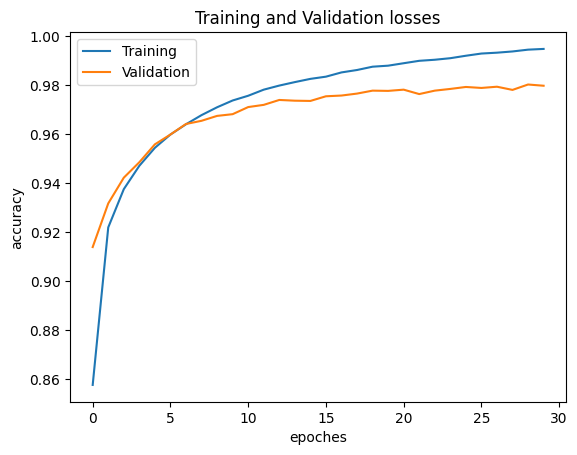

In [9]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoches')
plt.ylabel('accuracy')


Text(0, 0.5, 'loss')

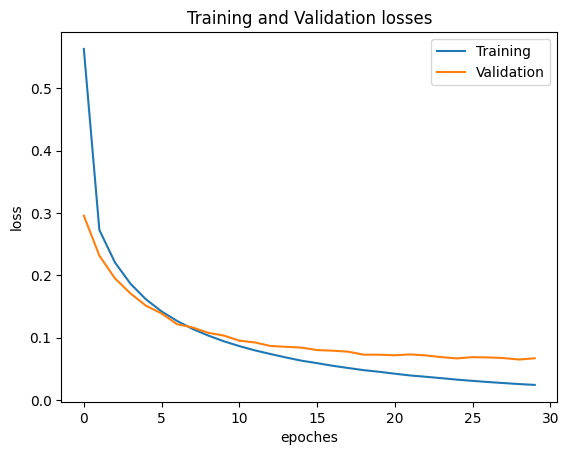

In [10]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoches')
plt.ylabel('loss')
